# ReTeach: Your new startup
> AI-powered Education

**Due Thursday, Sept 28 at 11:59pm**

## Background
You're the co-founder of an education startup, and are responsible for demonstrating a proof of concept for a new automated teacher feedback product called ReTeach. ReTeach is an automatic platform that listens to teachers in the classroom, and acts as an Observer to provide feedback to teachers. This process is usually done by a human observer, but the observer is rarely able to focus on deep dives into teaching strategy since they need to manually record many components of the data. Your product frees them from this responsibility so that their time can be spent critically assessing higher levels of teaching.

Your team has already collected some data is now entering the first phase of analysis, to:
* Ensure the data content is what is expected
* Determine what types of insights can be gathered from the data prior to modeling

### Data
Your data is as follows. You have:
* 3 teachers participating in the study. The teachers are anonymized by an ID.
* Each teacher is observed 3 times. Each observation results in a separate table (csv file).
* Each csv file has the same structure.
* Each csv file has 3 "columns": the timestamp of the beginning of the statement, the statement, and the label given by the observer about the statement.

***

## Assignment Instructions

* **Part 1**. In this portion of the assignment, you'll modify the data so that the analysis can be carried out. The first half of this assignment provides specific instructions regarding how the steps of the analysis should be carried out. Make sure to follow these instructions.
* **Part 2**: The second half of this assignment will leverage this modified dataframe and requires you to discern what is being asked and use Python/pandas code in order to determine te solution.

### Usage of Generative AI and Collaboration
You **cannot** copy/paste questions/data for this assignment into any generative AI to create solutions for you, **except** in the case of regular expressions. Just let it help you with regular expressions; do not expend any time trying to do these on your own (unless you just want to). 

You should attempt all of these questions on your own first, using the information we learned in class as well as the Pandas API. You can use the generative AI to _help_ you, meaning that you can give it your answer, explain your logic, and then ask it to explain any logical fallacies to you. It should not give you any direct answers. You can also work with other people, but you should not tell each other the answer or copy/paste answers from each other. You can discuss approaches, but you should not provide code or very specific answers to be submitted.

In [1]:
import pandas as pd
import numpy as np
import re

# A. Data Processing (60 Points Total)

## A1. Single Data Read (5 points Total)
1. Read in the `009-1.csv` dataframe using Pandas. This should be one line of code. (3)
2. Display the first 5 lines of the dataframe using Pandas. Use the appropriate method to do so. (2)

In [2]:
#code
df = pd.read_csv('/Users/chenhanlin/Dropbox/class (1)/Al-programming/Files/009-1.csv')
print(df.head(5))

        Timestamp                                               Text Label
0         0:00:00  Good morning class, today we are going to lear...   PRS
1  0:00:04.847265  A noun is a word that represents a person, pla...   NaN
2  0:00:09.220960           Can anyone give me an example of a noun?   OTR
3  0:00:14.115834  That's right, 'dog' is a noun because it is a ...   NaN
4  0:00:18.549212      Let's write down some nouns in our notebooks.   NaN


## A2. Create Starting and Ending Timestamp Columns (30 points Total)
In the following steps, you'll use `apply` to apply a function `str_to_ms` to the `Timestamp` column to convert its representation to milliseconds. You'll create two columns, one as the `start_timestamp`, and one as the `end_timestamp`. The timestamps have the format (generally) `hh:mm:ss.mmmmm` or similar.

### A2.1 Create `str_to_ms` function to be used with apply (10 points)
Write the `str_to_ms` function to be used with the apply. It takes as input the **string** of a single Timestamp and returns the **time in milliseconds.** The function has been started below for you.

<p style='color:green'><b>Strong</b> Hint: The best way to approach this is to use regular expressions. You can and should use generative AI to help you out with creating the expressions. </p>

In [3]:
# str_to_ms function
def str_to_ms(time_str):
# your code here
    pattern = r'(\d+):(\d+):(\d+)\.(\d+)'
    match = re.match(pattern, time_str)
    if not match:
        return 0
    
    hours, minutes, seconds,fractions = map(int, match.groups())
    ms = (hours * 3600 + minutes *60 + seconds) * 1000 + fractions/1000

    return ms


### A2.2 Create `start_timestamp` column (5 points)
Use the apply function to apply the `str_to_ms` function to your dataframe. The code below has been started for you, and you need to **fill in the arguments to `apply`**.

<p style='color:green'><b>Strong</b> Hint: Functions can be used in conjunction with lambda statements and with a `ternary conditional operator` statement. The ternary conditional operator format is extremely helpful when you want the result of a function as the output in one case (e.g., if the input value isn't NA), and a different value if the case fails (e.g., return NA if the input value is NA)</p>

In [4]:
#code, assuming df is the name of your dataframe
df['start_timestamp'] = df['Timestamp'].apply(lambda x:str_to_ms(x) if pd.notna(x) else None)  
print(df['start_timestamp']) #for check 

0          0.000
1       4847.265
2       9220.960
3      14115.834
4      18549.212
5            NaN
6            NaN
7      23013.970
8            NaN
9            NaN
10           NaN
11     27186.775
12     31558.534
13           NaN
14     35841.980
15     40398.608
16           NaN
17           NaN
18     44802.196
19           NaN
20     49434.353
21     54210.090
22     58450.456
23           NaN
24           NaN
25     63244.528
26           NaN
27     68036.927
28           NaN
29     72865.156
30           NaN
31     77103.391
32           NaN
33           NaN
34           NaN
35           NaN
36           NaN
37           NaN
38           NaN
39           NaN
40           NaN
41     81547.432
42           NaN
43     85740.881
44     90287.380
45           NaN
46           NaN
47     94568.614
48           NaN
49     99184.461
50           NaN
51           NaN
52    103534.288
53           NaN
54           NaN
55           NaN
56           NaN
57    107997.402
Name: start_ti

### A2.3 Create `end_timestamp` column (5 points)
As you can see, there are a number of `NAs` in the timestamp column. The transcript will be used to extract audio from the original recordings, so both a start and end timestamp is needed, and an estimate is suitable for now. Consider that the `start_timestamp` for row `n+1` is the `end_timestamp` for row n.

1. Mutate a column `end_timestamp` which is the exact same as the `start_timestamp` column (1 point).
2. **Use the appropriate pandas method** to shift the rows of `end_timestamp` back one "period" (index). Hint: this is a method that can be found under the `Time Series-related` section of the Pandas Dataframe API. (4 points)

In [5]:
#code
df['end_timestamp']=df['start_timestamp']
df['end_timestamp'] = df['end_timestamp'].shift(-1)
df #for check

,Timestamp,Text,Label,start_timestamp,end_timestamp
0,0:00:00,"Good morning class, today we are going to lear...",PRS,0.000,4847.265
1,0:00:04.847265,"A noun is a word that represents a person, pla...",NaN,4847.265,9220.960
2,0:00:09.220960,Can anyone give me an example of a noun?,OTR,9220.960,14115.834
3,0:00:14.115834,"That's right, 'dog' is a noun because it is a ...",NaN,14115.834,18549.212
4,0:00:18.549212,Let's write down some nouns in our notebooks.,NaN,18549.212,NaN
5,NaN,"Now, let's talk about verbs. Does anyone know ...",NaN,NaN,NaN
6,NaN,"A verb is a word that describes an action, occ...",NaN,NaN,23013.970
7,0:00:23.013970,Can someone give me an example of a verb?,OTR,23013.970,NaN
8,NaN,"Great example, 'run' is a verb because it is a...",PRS,NaN,NaN
9,NaN,"Now, let's write down some verbs in our notebo...",NaN,NaN,NaN


### A2.4 Fill NAs in `start_timestamp` column (5 points)
Now, you need to fill the NAs in the `start_timestamp` column and we'll just use an estimate. Since the statements are sequential, we will forward fill the column. In other words, going down the column, we will use the last valid observation to fill NAs up to the next valid. **Use the appropriate pandas method for this.** (Hint - this can be found under the Pandas DataFrame API, under Missing Data Handling).

In [6]:
#code
df['start_timestamp'] = df['start_timestamp'].ffill()
df #for check

,Timestamp,Text,Label,start_timestamp,end_timestamp
0,0:00:00,"Good morning class, today we are going to lear...",PRS,0.000,4847.265
1,0:00:04.847265,"A noun is a word that represents a person, pla...",NaN,4847.265,9220.960
2,0:00:09.220960,Can anyone give me an example of a noun?,OTR,9220.960,14115.834
3,0:00:14.115834,"That's right, 'dog' is a noun because it is a ...",NaN,14115.834,18549.212
4,0:00:18.549212,Let's write down some nouns in our notebooks.,NaN,18549.212,NaN
5,NaN,"Now, let's talk about verbs. Does anyone know ...",NaN,18549.212,NaN
6,NaN,"A verb is a word that describes an action, occ...",NaN,18549.212,23013.970
7,0:00:23.013970,Can someone give me an example of a verb?,OTR,23013.970,NaN
8,NaN,"Great example, 'run' is a verb because it is a...",PRS,23013.970,NaN
9,NaN,"Now, let's write down some verbs in our notebo...",NaN,23013.970,NaN


### A2.5 Fill NAs in the `end_timestamp` column (5 points)
Similarly to the forward fill logic, you will **backward fill** the `end_timestamp` column. **Use the appropriate pandas method for this.** (Hint - this can be found under the Pandas DataFrame API, under Missing Data Handling). (3 points)


In [7]:
#code
df['end_timestamp'] = df['end_timestamp'].bfill()
df

,Timestamp,Text,Label,start_timestamp,end_timestamp
0,0:00:00,"Good morning class, today we are going to lear...",PRS,0.000,4847.265
1,0:00:04.847265,"A noun is a word that represents a person, pla...",NaN,4847.265,9220.960
2,0:00:09.220960,Can anyone give me an example of a noun?,OTR,9220.960,14115.834
3,0:00:14.115834,"That's right, 'dog' is a noun because it is a ...",NaN,14115.834,18549.212
4,0:00:18.549212,Let's write down some nouns in our notebooks.,NaN,18549.212,23013.970
5,NaN,"Now, let's talk about verbs. Does anyone know ...",NaN,18549.212,23013.970
6,NaN,"A verb is a word that describes an action, occ...",NaN,18549.212,23013.970
7,0:00:23.013970,Can someone give me an example of a verb?,OTR,23013.970,27186.775
8,NaN,"Great example, 'run' is a verb because it is a...",PRS,23013.970,27186.775
9,NaN,"Now, let's write down some verbs in our notebo...",NaN,23013.970,27186.775


## A3. Fill last NAs and create new column (5 points)
1. Now, mutate a column called `duration_ms`. This is calcuated as the `end_timestamp` - `start_timestamp`. Use the **appropriate pandas method for this based on in the in-class discussion and notes.** (2 points)
2. Fill all NAs in the `label` column such that they have the value `NEU`. **Use an appropriate pandas method for this; e.g., the ones discussed in-class or as examples in notes.** (3 points)

In [8]:
#code
df['duration_ms']=df['end_timestamp']-df['start_timestamp']
df['Label']=df['Label'].fillna('NEU')
df

,Timestamp,Text,Label,start_timestamp,end_timestamp,duration_ms
0,0:00:00,"Good morning class, today we are going to lear...",PRS,0.000,4847.265,4847.265
1,0:00:04.847265,"A noun is a word that represents a person, pla...",NEU,4847.265,9220.960,4373.695
2,0:00:09.220960,Can anyone give me an example of a noun?,OTR,9220.960,14115.834,4894.874
3,0:00:14.115834,"That's right, 'dog' is a noun because it is a ...",NEU,14115.834,18549.212,4433.378
4,0:00:18.549212,Let's write down some nouns in our notebooks.,NEU,18549.212,23013.970,4464.758
5,NaN,"Now, let's talk about verbs. Does anyone know ...",NEU,18549.212,23013.970,4464.758
6,NaN,"A verb is a word that describes an action, occ...",NEU,18549.212,23013.970,4464.758
7,0:00:23.013970,Can someone give me an example of a verb?,OTR,23013.970,27186.775,4172.805
8,NaN,"Great example, 'run' is a verb because it is a...",PRS,23013.970,27186.775,4172.805
9,NaN,"Now, let's write down some verbs in our notebo...",NEU,23013.970,27186.775,4172.805


## A4. Process all data files (15 points Total)
Now, you'll read in all of the data to create an entire dataset. The final dataset will be a long dataset of ALL of the files concatenated together.

### A4.1 Read in all of the data as a list of dataframes. (5 points)
1. Get a list of the filenames of all csv files. You can do this using `glob`, `os`, or any other automated method that will allow you to get a list of all csvs. (1 point)
2. Using a list comprehension and the pandas data reading functionality performed in A1, read in all the dataframes, resulting in a list of dataframes. (4 points)

In [9]:
#code
import os 
directory ='/Users/chenhanlin/Dropbox/class (1)/Al-programming/Files'
# a list of filenames 
csv_files = [f for f in os.listdir(directory) if f.endswith('.csv')]
print(csv_files)

['522-3.csv', '522-2.csv', '522-1.csv', '009-3.csv', '231-2.csv', '231-3.csv', '009-2.csv', '231-1.csv', '009-1.csv']


In [10]:
# a list of dataframes 
list_of_dataframe = [pd.read_csv(f'{directory}/{file}') for file in csv_files]
print(list_of_dataframe)

[          Timestamp                                               Text Label
0             00:00  Good morning class, today we are going to beco...   PRS
1   00:00:03.978905  Weather refers to the short-term atmospheric c...   NaN
2   00:00:08.950206  Climate, on the other hand, refers to the long...   NaN
3               NaN  Let's start with the different elements of wea...   OTR
4               NaN  Good job! Temperature is indeed an important e...   NaN
..              ...                                                ...   ...
73  00:04:50.483633                Let's end the class here for today.   OTR
74              NaN  Make sure to revise everything we discussed to...   NaN
75              NaN  And start working on your report from today; d...   REP
76              NaN  Thank you and I hope to see a more attentive c...   NaN
77              NaN  Goodbye and take responsibility for your learn...   REP

[78 rows x 3 columns],           Timestamp                                

### A4.2 Mutate the teacher ID number on to each dataframe (5 points)
Now, we'll need to add the teacher ID column (called `teacher_id`) to each dataframe. We can do this by using the `assign` method for dataframes (use the API for details and examples), and modify the previous list comprehension to create the dataframes so we do both of these operations in one step.

**Strong** hint: Use the `re.split()` method for this and the following question!

In [11]:
import re

In [12]:
#code
#list of dataframes with teacher ids
list_df_teacher=[list_of_dataframe[file_number].assign(teacher_id=lambda x: re.split('-',csv_files[file_number])[0])for file_number in range(0,len(csv_files))]
#for file_number in range(0,len(csv_files)):
    #df_w_teacher = list_of_dataframe[file_number].assign(teacher_id=lambda x: re.split('-',csv_files[file_number])[0])
    #list_df_teacher.append(df_w_teacher)


### A4.3 Mutate the observation ID on to each dataframe (5 points)
We can again modify the list comprehension from A4.2 to also create a column for `observation_id` through modifying the arguments to the `assign` method. Do this so that in one list comprehension, we create a dataframe from the csv, create a `teacher_id` column, and also create a `observation_id` column.

In [13]:
#code
#list of dataframes with observation ids
list_df_observation=[list_df_teacher[file_number].assign(observation_id=lambda x: re.split('\.',re.split('-',csv_files[file_number])[1])[0])for file_number in range(0,len(csv_files))]
print(list_df_observation)


[          Timestamp                                               Text Label  \
0             00:00  Good morning class, today we are going to beco...   PRS   
1   00:00:03.978905  Weather refers to the short-term atmospheric c...   NaN   
2   00:00:08.950206  Climate, on the other hand, refers to the long...   NaN   
3               NaN  Let's start with the different elements of wea...   OTR   
4               NaN  Good job! Temperature is indeed an important e...   NaN   
..              ...                                                ...   ...   
73  00:04:50.483633                Let's end the class here for today.   OTR   
74              NaN  Make sure to revise everything we discussed to...   NaN   
75              NaN  And start working on your report from today; d...   REP   
76              NaN  Thank you and I hope to see a more attentive c...   NaN   
77              NaN  Goodbye and take responsibility for your learn...   REP   

   teacher_id observation_id  
0      

### A4.3 Create function that encapsulates all of this pre-processing (5 points)
Now, you'll create a function that includes all of this functionality. The input is a single dataframe and the output is the processed dataframe with new timestamp columns and the duration calculated.

In [14]:
#code
import os 
def str_to_ms(time_str):
# your code here
    pattern = r'(\d+):(\d+):(\d+)\.(\d+)'
    match = re.match(pattern, time_str)
    if not match:
        return 0
    
    hours, minutes, seconds,fractions = map(int, match.groups())
    ms = (hours * 3600 + minutes *60 + seconds) * 1000 + fractions/1000

    return ms

def preprocess_transcripts(df_in):
    # Your code here
    #new timestamp columns
    df_out = df_in
    df_out['start_timestamp'] = df_out['Timestamp'].apply(lambda x:str_to_ms(x) if pd.notna(x) else None)  
    df_out['end_timestamp']=df_out['start_timestamp']
    df_out['end_timestamp'] = df_out['end_timestamp'].shift(-1)
    df_out['start_timestamp'] = df_out['start_timestamp'].ffill()
    df_out['end_timestamp'] = df_out['end_timestamp'].bfill()
    
    #duration 
    df_out['duration_ms']=df_out['end_timestamp']-df_out['start_timestamp']
    df_out['Label']=df_out['Label'].fillna('NEU')

    return df_out

test = pd.read_csv("/Users/chenhanlin/Dropbox/class (1)/Al-programming/Files/009-1.csv")
preprocess_transcripts(test)

,Timestamp,Text,Label,start_timestamp,end_timestamp,duration_ms
0,0:00:00,"Good morning class, today we are going to lear...",PRS,0.000,4847.265,4847.265
1,0:00:04.847265,"A noun is a word that represents a person, pla...",NEU,4847.265,9220.960,4373.695
2,0:00:09.220960,Can anyone give me an example of a noun?,OTR,9220.960,14115.834,4894.874
3,0:00:14.115834,"That's right, 'dog' is a noun because it is a ...",NEU,14115.834,18549.212,4433.378
4,0:00:18.549212,Let's write down some nouns in our notebooks.,NEU,18549.212,23013.970,4464.758
5,NaN,"Now, let's talk about verbs. Does anyone know ...",NEU,18549.212,23013.970,4464.758
6,NaN,"A verb is a word that describes an action, occ...",NEU,18549.212,23013.970,4464.758
7,0:00:23.013970,Can someone give me an example of a verb?,OTR,23013.970,27186.775,4172.805
8,NaN,"Great example, 'run' is a verb because it is a...",PRS,23013.970,27186.775,4172.805
9,NaN,"Now, let's write down some verbs in our notebo...",NEU,23013.970,27186.775,4172.805


### A4.4 Use `preprocess_transcripts` function to preprocess all data and create a final dataframe (5 points)
1. Using the list of dataframes you created above and a list comprehension, apply the pre-processing function to each of your dataframes. The result should be a list of processed dataframes. (2 points)
2. Use `pd.concat` to concatenate all of the dataframes into one long dataframe. (3 points)

In [15]:
#code
list_df_observation = [preprocess_transcripts(list) for list in list_df_observation]
print(list_df_observation)

[          Timestamp                                               Text Label  \
0             00:00  Good morning class, today we are going to beco...   PRS   
1   00:00:03.978905  Weather refers to the short-term atmospheric c...   NEU   
2   00:00:08.950206  Climate, on the other hand, refers to the long...   NEU   
3               NaN  Let's start with the different elements of wea...   OTR   
4               NaN  Good job! Temperature is indeed an important e...   NEU   
..              ...                                                ...   ...   
73  00:04:50.483633                Let's end the class here for today.   OTR   
74              NaN  Make sure to revise everything we discussed to...   NEU   
75              NaN  And start working on your report from today; d...   REP   
76              NaN  Thank you and I hope to see a more attentive c...   NEU   
77              NaN  Goodbye and take responsibility for your learn...   REP   

   teacher_id observation_id  start_ti

In [16]:
long_df = pd.concat(list_df_observation)
print(long_df)

          Timestamp                                               Text Label  \
0             00:00  Good morning class, today we are going to beco...   PRS   
1   00:00:03.978905  Weather refers to the short-term atmospheric c...   NEU   
2   00:00:08.950206  Climate, on the other hand, refers to the long...   NEU   
3               NaN  Let's start with the different elements of wea...   OTR   
4               NaN  Good job! Temperature is indeed an important e...   NEU   
..              ...                                                ...   ...   
53              NaN  For homework, please write a short story using...   NEU   
54              NaN  Make sure to include nouns, verbs, adjectives,...   NEU   
55              NaN  Don't forget to use correct punctuation in you...   NEU   
56              NaN      I am looking forward to reading your stories.   PRS   
57   0:01:47.997402  Have a great day, and remember to keep practic...   NEU   

   teacher_id observation_id  start_tim

# B. Assessment and Extracting Insights
This section will be more freeform and use the dataframe created above. Your objective is to answer the following questions, using the methods and techniques discussed in class. This includes the grammar of data manipulation, including groupby, aggregation, groupby-apply, and others. Plotting should be accomplished using pandas primarily, but matplotlib can also be used when needed.

## B1. Basic data inspection (10 points Total)
### B1.1 Using code (5 points):
* Calculate how many teachers are present in the dataset (for assumption confirmation).
* Calculate the number of observations per teacher (for assumption confirmation).
Briefly comment about whether these results confirm the assumptions about the data content.

In [17]:
#code
print(f"There are {long_df.groupby('teacher_id').ngroups} teachers.")
grouped_by_teacher = long_df.groupby('teacher_id')['observation_id'].nunique()
print(f"The number of observation for each teacher is:\n{grouped_by_teacher}")

There are 3 teachers.
The number of observation for each teacher is:
teacher_id
009    3
231    3
522    3
Name: observation_id, dtype: int64


[commentary] These data come from three teachers and each teacher was observed three times. Therefore, the assumption is that the number of teacher is three and the number of observations for each teacher is three. The results confirm the assumptions. 

### B1.2 Using code and visualizations (5 points):
How many utterances (i.e., statements, rows) is each observation for each teacher? Provide visualizations and comment on whether these appear to be different by visual inspection.

teacher_id  observation_id
009         1                 58
            2                 35
            3                 34
231         1                 60
            2                 85
            3                 73
522         1                 69
            2                 62
            3                 78
Name: Text, dtype: int64


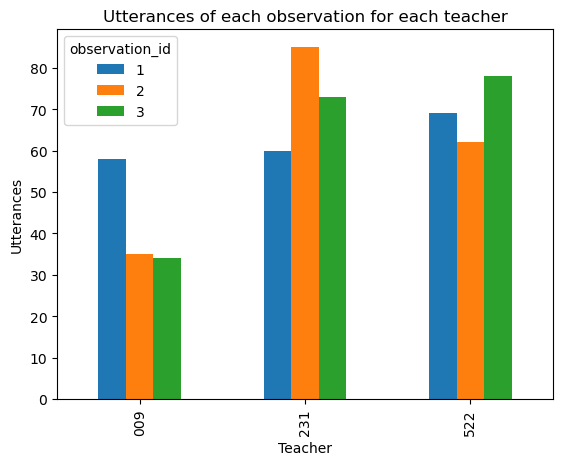

In [18]:
#code
grouped_by_observation_teacher = long_df.groupby(['teacher_id','observation_id'])
print(grouped_by_observation_teacher['Text'].count())

import matplotlib.pyplot as plt
stacked_data_b = grouped_by_observation_teacher['Text'].count()
unstacked_data_b = stacked_data_b.unstack(level = 'observation_id') 

plot = unstacked_data_b.plot(kind='bar')
plt.xlabel('Teacher')
plt.ylabel('Utterances')
plt.title('Utterances of each observation for each teacher')
plt.show()


[commentary] I open each file and check the rows of the utterances by my eyes and I find the results are same. I also make a plot and the results are same. For observation 1, 2, 3, teacher 009 is 58, 35, 34; teacher 231 is 60, 85, 73; and teacher 522 is 69, 62, 78.

## B.2 What is the distribution of labels across all teachers? How does this compare to the distribution of labels across each teacher (using all 3 observations as a single observation)? (10 points)- Question
Both sides of this question should be answered using code **and visualizations** as appropriate. For plots, make sure that axes are labeled and titles are used. A visual inspection of the differences is sufficient. Make sure you comment on your answer to explain your thoughts.

Label
NEU    289
OTR    114
PRS     94
REP     57
Name: Text, dtype: int64


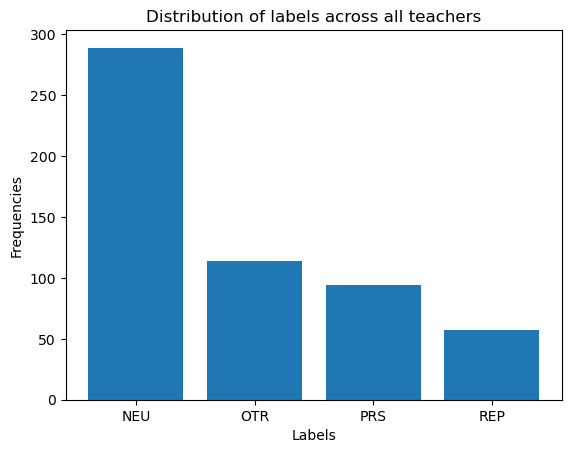

In [19]:
# code
# part 1
grouped_by_label = long_df.groupby(['Label'])
print(grouped_by_label['Text'].count()) #series

data = grouped_by_label['Text'].count()
plt.bar(data.index, data.values)
plt.xlabel('Labels')
plt.ylabel('Frequencies')
plt.title('Distribution of labels across all teachers')
plt.show()



teacher_id  Label
009         NEU       82
            OTR       22
            PRS       23
231         NEU       90
            OTR       43
            PRS       44
            REP       41
522         NEU      117
            OTR       49
            PRS       27
            REP       16
Name: Text, dtype: int64


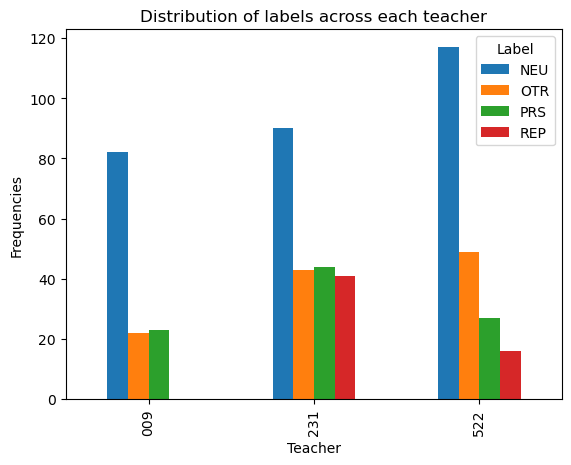

In [20]:
# part 2

grouped_by_teacher_label = long_df.groupby(['teacher_id','Label'])
print(grouped_by_teacher_label['Text'].count())

stacked_data = grouped_by_teacher_label['Text'].count()
unstacked_data = stacked_data.unstack(level = 'Label') 

plot = unstacked_data.plot(kind='bar')
plt.xlabel('Teacher')
plt.ylabel('Frequencies')
plt.title('Distribution of labels across each teacher')
plt.show()

[commentary] The graphs provide quick insights, helping me understand the patterns and differences rapidly. The code makes it convenient for us to perform a wide range of analyses and document the analysis process. 522 has the most invalid data, followed by 231 and 009. Among all the teachers, for the non-missing data, OTR is the most frequent, followed by PRS and REP. 009 has two labels, while 231 and 522 each have three labels. For both 009 and 231, the frequencies for each label are similar. However, for 522, the label OTR is the most frequent, followed by PRS and REP. Only 522 matches the overall distribution pattern.

## B.3 What is the distribution of labels across observers? Do some observers seem to assign a greater proportional of a certain type of label than others? (10 points)
Answer using code **and visualizations** as appropriate. For plots, make sure that axes are labeled and titles are used. A visual inspection of the differences is sufficient. Make sure you comment on your answer to explain your thoughts, and also discuss other interpretations of any differences in the distribution of labels across observers.

In [21]:
# code
grouped_by_teacher_label_observation = long_df.groupby(['observation_id','Label'])
print(grouped_by_teacher_label_observation ['Text'].count())

observation_id  Label
1               NEU      95
                OTR      34
                PRS      22
                REP      36
2               NEU      96
                OTR      37
                PRS      49
3               NEU      98
                OTR      43
                PRS      23
                REP      21
Name: Text, dtype: int64


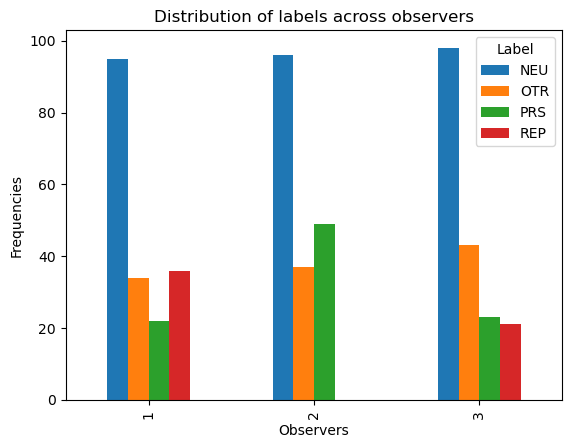

In [22]:
stacked_data_2 = grouped_by_teacher_label_observation ['Text'].count()
unstacked_data_2 = stacked_data_2.unstack(level = 'Label') 

plot = unstacked_data_2.plot(kind='bar')
plt.xlabel('Observers')
plt.ylabel('Frequencies')
plt.title('Distribution of labels across observers')
plt.show()

[commentary] All the observers have the similar number of invalid data. As for the valid data, observer 2 appears to categorize all the texts into OTR and PRS, excluding REP. Observer 2 seems to allocate a much larger proportion to the PRS type than others. Observer 3 appears to assign a larger proportion to the OTR type compared to others. Observer 1 seems to allocate a larger proportion to the REP type and a smaller proportion to PRS.

## B4. Teacher statements (10 points total)
### B4.1 Calculate the total number of words in each statement for each teacher (5 points).
Here, we will just get an estimate of this value by splitting each value on the spaces and then calculating the length of the resulting split. Mutate this column onto the dataset.

In [23]:
#code
long_df['total_number_words'] = long_df['Text'].apply(lambda x:len(x.split()) if pd.notna(x) else None)  
long_df

,Timestamp,Text,Label,teacher_id,observation_id,start_timestamp,end_timestamp,duration_ms,total_number_words
0,00:00,"Good morning class, today we are going to beco...",PRS,522,3,0.000,3978.905,3978.905,16
1,00:00:03.978905,Weather refers to the short-term atmospheric c...,NEU,522,3,3978.905,8950.206,4971.301,15
2,00:00:08.950206,"Climate, on the other hand, refers to the long...",NEU,522,3,8950.206,21301.827,12351.621,16
3,NaN,Let's start with the different elements of wea...,OTR,522,3,8950.206,21301.827,12351.621,15
4,NaN,Good job! Temperature is indeed an important e...,NEU,522,3,8950.206,21301.827,12351.621,10
...,...,...,...,...,...,...,...,...,...
53,NaN,"For homework, please write a short story using...",NEU,009,1,103534.288,107997.402,4463.114,13
54,NaN,"Make sure to include nouns, verbs, adjectives,...",NEU,009,1,103534.288,107997.402,4463.114,12
55,NaN,Don't forget to use correct punctuation in you...,NEU,009,1,103534.288,107997.402,4463.114,9
56,NaN,I am looking forward to reading your stories.,PRS,009,1,103534.288,107997.402,4463.114,8


### B4.2 What is the overall distribution of statement lengths? How does this compare to the distribution of statement lengths across each teacher(using all 3 observations as a single observation)? (5 points)
Both sides of this question should be answered using code **and visualizations** as appropriate. For plots, make sure that axes are labeled and titles are used. A visual inspection of the differences is sufficient. Make sure you comment on your answer to explain your thoughts.

count    554.000000
mean      11.332130
std        3.329654
min        4.000000
25%        9.000000
50%       11.000000
75%       13.000000
max       25.000000
Name: total_number_words, dtype: float64


Text(0.5, 1.0, 'Overall distribution of statement lengths')

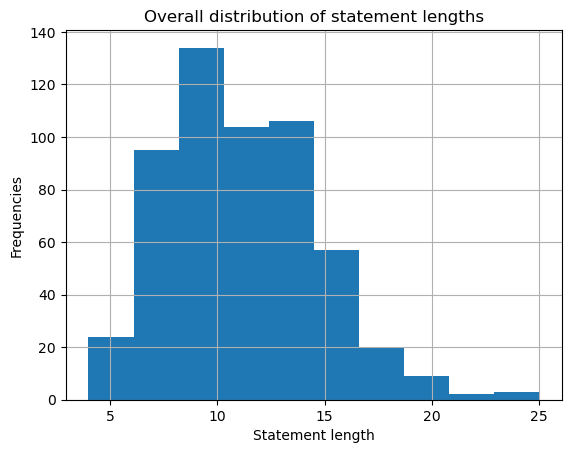

In [24]:
#code
# overall distribution
print(long_df['total_number_words'].describe())
long_df['total_number_words'].hist()
plt.xlabel("Statement length")
plt.ylabel("Frequencies")
plt.title("Overall distribution of statement lengths")

            count       mean       std  min   25%   50%   75%   max
teacher_id                                                         
009         127.0  10.283465  2.544517  5.0   8.0  10.0  12.0  20.0
231         218.0  10.600917  3.013243  4.0   8.0  10.0  12.0  19.0
522         209.0  12.732057  3.588842  5.0  10.0  13.0  15.0  25.0


Text(0.5, 1.0, 'Distribution of statement lengths across each teacher')

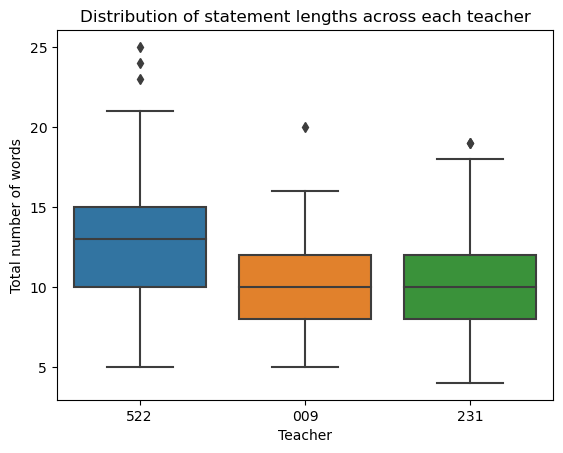

In [25]:
# distribution across each teacher 
long_df_teacher_words = long_df.groupby('teacher_id')
print(long_df_teacher_words['total_number_words'].describe())
import seaborn as sns #I checked with professor and seaborn is ok to use 
sns.boxplot(x='teacher_id',y='total_number_words',data=long_df)
plt.xlabel("Teacher")
plt.ylabel("Total number of words")
plt.title("Distribution of statement lengths across each teacher")

[commentary]Overall, the maximum length of a teacher's statement is 25, while the minimum is 4. The average length is 11, with a median also at 11. The interquartile range, representing the middle 50% of the data, spans from 9 to 13. Comparing individual teachers, 522 is the only one whose average (12.7) and median (13) exceed the overall average and median. Both 009 and 231 share the same median of 10. Among them, 522 possesses the largest maximum statement length, followed by 009 and then 231. Conversely, 231 has the smallest minimum statement length. The range for 522 is from 5 to 25, making it the broadest among the teachers. Additionally, 522 has a slightly longer interquartile range compared to 009 and 231. 